In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import warnings; warnings.simplefilter('ignore')
from sklearn.preprocessing import StandardScaler

In [ ]:
data_train=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/training.csv")
     

data_test=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/testing.csv")

In [ ]:
train.isnull().sum()


pkSeqID              0
proto                0
saddr                0
sport                0
daddr                0
dport                0
seq                  0
stddev               0
N_IN_Conn_P_SrcIP    0
min                  0
state_number         0
mean                 0
N_IN_Conn_P_DstIP    0
drate                0
srate                0
max                  0
attack               0
category             0
subcategory          0
dtype: int64

EDA

In [ ]:
data_train.drop(["pkSeqID","seq","subcategory"], axis=1, inplace=True)
     

data_test.drop(["pkSeqID","seq","subcategory"], axis=1, inplace=True)

In [ ]:
data_train.dtypes[data_train.dtypes=='object']


proto       object
saddr       object
sport       object
daddr       object
dport       object
category    object
dtype: object

In [ ]:
data_train['saddr'].value_counts()


192.168.100.147              761360
192.168.100.148              738642
192.168.100.150              712260
192.168.100.149              711466
192.168.100.3                  6609
192.168.100.5                  4107
192.168.100.6                   272
192.168.100.7                    34
192.168.100.4                    17
192.168.100.1                    14
192.168.100.27                    9
192.168.100.46                    8
fe80::250:56ff:febe:254           5
192.168.100.55                    3
fe80::2c6a:ff9b:7e14:166a         2
fe80::250:56ff:febe:c038          2
fe80::c0c0:aa20:45b9:bdd9         2
fe80::250:56ff:febe:89ee          2
fe80::250:56ff:febe:26db          2
fe80::250:56ff:febe:e9d9          1
Name: saddr, dtype: int64

In [ ]:
data_train['sport'].value_counts()


0x0303    7156
80        3220
1822       878
60541      869
1216       868
          ... 
39364       31
18992       30
39305       30
0x000d      10
0x0011       8
Name: sport, Length: 65541, dtype: int64

In [ ]:
data_train['daddr'].value_counts()
     


192.168.100.3      1900562
192.168.100.5       361192
192.168.100.7       332161
192.168.100.6       329679
192.168.100.150       3040
                    ...   
205.251.199.148          1
192.33.14.30             1
192.55.83.30             1
205.251.194.201          1
205.251.198.119          1
Name: daddr, Length: 81, dtype: int64

In [ ]:
data_train['dport'].value_counts()


80       2858794
1           5379
3306        3757
53           275
-1           166
          ...   
40344          1
3754           1
6459           1
26822          1
61804          1
Name: dport, Length: 6906, dtype: int64

In [ ]:
data_train['category'].value_counts()


DDoS              1541315
DoS               1320148
Reconnaissance      72919
Normal                370
Theft                  65
Name: category, dtype: int64

In [ ]:
indexNames = data_train[data_train['category']=='Theft'].index
data_train.drop(indexNames , inplace=True)

In [ ]:

data_train['sport']=data_train['sport'].replace(['0x0303'],'771') 
data_train['sport']=data_train['sport'].replace(['0x0011'],'17')
data_train['sport']=data_train['sport'].replace(['0x000d'],'13')
data_train['sport']=data_train['sport'].replace(['0x0008'],'8')
     

In [ ]:
data_train["sport"] = data_train["sport"].astype(str).astype(int)
     

data_test['sport']=data_test['sport'].replace(['0x0303'],'771') 
data_test['sport']=data_test['sport'].replace(['0x0011'],'17')
data_test['sport']=data_test['sport'].replace(['0x000d'],'13')
data_test['sport']=data_test['sport'].replace(['0x0008'],'8')
     

data_test["sport"] = data_test["sport"].astype(str).astype(int)
     

data_train['dport']=data_train.dport.apply(lambda x: int(x,16) if len(x)>1 and x[1]=="x" else int(x))
     

data_test['dport']=data_test.dport.apply(lambda x: int(x,16) if len(x)>1 and x[1]=="x" else int(x))

In [ ]:
data_train['dport'].value_counts()


 80       2858794
 1           5379
 3306        3757
 53           275
-1            163
           ...   
 40064          1
 40027          1
 40344          1
 3754           1
 61804          1
Name: dport, Length: 6778, dtype: int64

In [ ]:
data_train['sport'].value_counts()


771      7203
80       3220
1822      878
60541     869
1216      868
         ... 
7813       31
56775      31
39364      31
39305      30
18992      30
Name: sport, Length: 65537, dtype: int64

One hot encoding

In [ ]:

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data_train["saddr_enc"]= le.fit_transform(data_train.saddr)
data_train["daddr_enc"]= le.fit_transform(data_train.daddr)
data_train["proto_enc"]= le.fit_transform(data_train.proto)
data_train["category_enc"]= le.fit_transform(data_train.category)
data_train.drop(['saddr','daddr','proto','category'], axis=1, inplace=True)

In [ ]:

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data_test["saddr_enc"]= le.fit_transform(data_test.saddr)
data_test["daddr_enc"]= le.fit_transform(data_test.daddr)
data_test["proto_enc"]= le.fit_transform(data_test.proto)
data_test["category_enc"]= le.fit_transform(data_test.category)
data_test.drop(['saddr','daddr','proto','category'], axis=1, inplace=True)

In [ ]:
data_train.head()


,sport,dport,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,attack,saddr_enc,daddr_enc,proto_enc,category_enc
0,6551,80,1.900363,100,0.000000,4,2.687519,100,0.0,0.494549,4.031619,1,4,15,4,0
1,5532,80,0.078003,38,3.856930,3,3.934927,100,0.0,0.256493,4.012924,1,4,15,3,0
2,27165,80,0.268666,100,2.974100,3,3.341429,100,0.0,0.294880,3.609205,1,1,15,3,0
3,48719,80,1.823185,63,0.000000,4,3.222832,63,0.0,0.461435,4.942302,1,4,15,4,1
4,22461,80,0.822418,100,2.979995,4,3.983222,100,0.0,1.002999,4.994452,1,1,15,4,0


In [ ]:
data_train['category_enc'].value_counts()


0    1541315
1    1320148
3      72919
2        370
Name: category_enc, dtype: int64

In [ ]:
y_train=data_train["category_enc"]


In [ ]:
y_test=data_test["category_enc"]


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
features = data_train.iloc[:,:-1]
cols=features.columns
scaled_features= scaler.fit_transform(features)
data_train= pd.DataFrame(scaled_features,columns=cols)

In [ ]:

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
features = data_test.iloc[:,:-1]
cols=features.columns
scaled_features= scaler.fit_transform(features)
data_test= pd.DataFrame(scaled_features,columns=cols)

In [ ]:
import imblearn
from imblearn.over_sampling import RandomOverSampler
samp_strat= { 0 : 1541315, 1 : 1320148, 2 : 72919, 3 : 72919}
random_over= RandomOverSampler(sampling_strategy=samp_strat,random_state=1)
Xres,yres = random_over.fit_resample(data_train,y_train)

In [ ]:
pd.Series(yres).value_counts()


0    1541315
1    1320148
3      72919
2      72919
Name: category_enc, dtype: int64

In [ ]:
import imblearn
from imblearn.under_sampling import RandomUnderSampler
samp_strat= { 0 : 72919, 1 : 72919, 2 : 72919, 3 : 72919}
random_under= RandomUnderSampler(sampling_strategy=samp_strat,random_state=1)
Xres1,yres1 = random_under.fit_resample(Xres,yres)


In [ ]:
pd.Series(yres1).value_counts()


0    72919
1    72919
2    72919
3    72919
Name: category_enc, dtype: int64

Detection Using Logistic Regression

In [ ]:

from sklearn.linear_model import LogisticRegression
import time
start = time.time()
logisticRegr = LogisticRegression()
logisticRegr.fit(Xres1, yres1)
pred= logisticRegr.predict(data_test)
score = logisticRegr.score(data_test, y_test)
end = time.time()
print(end - start, "seconds\n")
score

15.704656839370728 seconds



0.975627806816091

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
classification_report(y_test,pred)

'              precision    recall  f1-score   support\n\n           0       0.97      0.99      0.98    385309\n           1       0.99      0.96      0.98    330112\n           2       1.00      1.00      1.00       107\n           3       0.81      0.95      0.88     18163\n           4       0.00      0.00      0.00        14\n\n    accuracy                           0.98    733705\n   macro avg       0.76      0.78      0.77    733705\nweighted avg       0.98      0.98      0.98    733705\n'

In [ ]:
confusion_matrix(y_test,pred)


array([[379901,   1570,      0,   3838,      0],
       [ 11451, 318487,      0,    174,      0],
       [     0,      0,    107,      0,      0],
       [   404,    431,      0,  17328,      0],
       [     0,     13,      0,      1,      0]])

In [ ]:

from sklearn.metrics import f1_score
f1_score(y_test,pred,average='micro')

0.975627806816091

In [ ]:

from sklearn.metrics import recall_score
recall_score(y_test, pred, average='micro')

0.975627806816091

In [ ]:

from sklearn.metrics import precision_score
precision_score(y_test,pred, average='micro')

0.975627806816091

In [ ]:
y_test


0         1
1         0
2         0
3         0
4         1
         ..
733700    1
733701    0
733702    0
733703    1
733704    0
Name: category_enc, Length: 733705, dtype: int64

In [ ]:

y_pred_proba=logisticRegr.predict_proba(data_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
prediction = logisticRegr.predict(data_test)
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98    385309
           1       0.99      0.96      0.98    330112
           2       1.00      1.00      1.00       107
           3       0.81      0.95      0.88     18163
           4       0.00      0.00      0.00        14

    accuracy                           0.98    733705
   macro avg       0.76      0.78      0.77    733705
weighted avg       0.98      0.98      0.98    733705



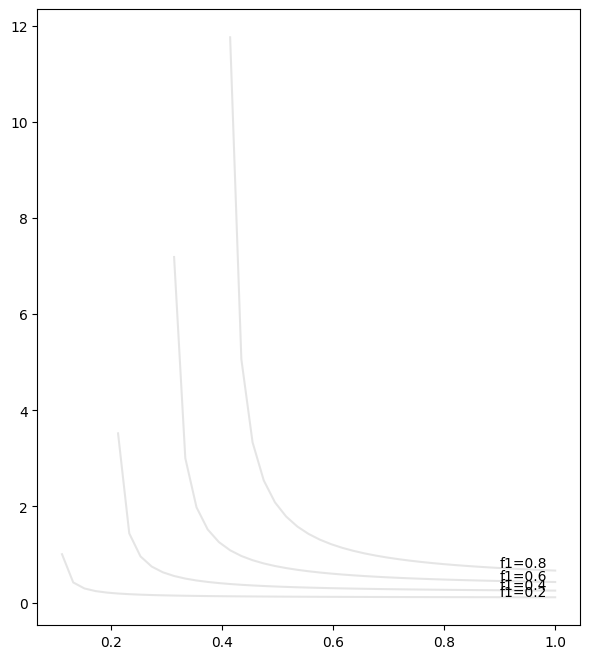

In [ ]:
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from itertools import cycle

plt.figure(figsize=(7, 8))
f_scores = np.linspace(0.2, 0.8, num=4)
lines = []
labels = []
for f1_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f1_score * x / (2 * x - f1_score)
    l, = plt.plot(x[y >= 0], y[y >= 0], color='gray', alpha=0.2)
    plt.annotate('f1={0:0.1f}'.format(f1_score), xy=(0.9, y[45] + 0.02))
lines.append(l)
labels.append('iso-f1 curves')
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
lr2 = LogisticRegression(penalty='l2',C = 25, solver = 'lbfgs',max_iter=1000,n_jobs=100)
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lr2, Xres1, yres1, cv=10)
scores

array([0.98604635, 0.98656061, 0.98676632, 0.98741772, 0.98666347,
       0.9868006 , 0.987143  , 0.98686872, 0.98594302, 0.98721157])

In [ ]:
scores.mean()

0.9867421392152979

Detection using Support Vector Machines

In [ ]:
from sklearn import model_selection
from sklearn.model_selection import StratifiedKFold,cross_val_score
from sklearn.svm import SVC

In [ ]:
# model = SVC(verbose=1,random_state=42)
# model.fit(train,y_train)
# score = model.score(test,y_test)
# score

In [ ]:
# from sklearn.metrics import classification_report,confusion_matrix
# prediction = model.predict(test)
# print(classification_report(y_test,prediction))

In [ ]:
# print(confusion_matrix(y_test,prediction))

In [ ]:
import imblearn
from imblearn.over_sampling import RandomOverSampler
samp_strat= { 0 : 1541315, 1 : 1320148, 2 : 72919, 3 : 72919}
random_over= RandomOverSampler(sampling_strategy=samp_strat,random_state=1)
Xres,yres = random_over.fit_resample(train,y_train)

In [ ]:
pd.Series(yres).value_counts()

0    1541315
1    1320148
3      72919
2      72919
Name: category_enc, dtype: int64

In [ ]:
import imblearn
from imblearn.under_sampling import RandomUnderSampler
samp_strat= { 0 : 72919, 1 : 72919, 2 : 72919, 3 : 72919}
random_under= RandomUnderSampler(sampling_strategy=samp_strat,random_state=1)
Xres1,yres1 = random_under.fit_resample(Xres,yres)

In [ ]:
pd.Series(yres1).value_counts()

3    72919
2    72919
1    72919
0    72919
Name: category_enc, dtype: int64

In [ ]:
model = SVC(verbose=1,random_state=42)
model.fit(Xres1,yres1)
score = model.score(test,y_test)
score

[LibSVM]

0.8990678637191951

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
prediction = model.predict(test)
print(classification_report(y_test,prediction))


              precision    recall  f1-score   support

           0       0.89      0.93      0.91    385309
           1       1.00      0.86      0.92    330112
           2       1.00      0.99      1.00       107
           3       0.38      0.93      0.54     18163

    accuracy                           0.90    733691
   macro avg       0.82      0.93      0.84    733691
weighted avg       0.92      0.90      0.91    733691



In [ ]:
print(confusion_matrix(y_test,prediction))

[[359050    157      0  26102]
 [ 44781 283591      0   1740]
 [     0      0    106      1]
 [   339    933      0  16891]]


In [ ]:
model = SVC()
skf = StratifiedKFold(n_splits=10,shuffle=True,random_state=42)
scores = cross_val_score(model,Xres1,yres1,scoring='accuracy',cv=skf)

In [ ]:
scores

array([0.92594624, 0.93043747, 0.92995749, 0.92868897, 0.93006034,
       0.92892896, 0.92405801, 0.92659512, 0.92724655, 0.92830939])

In [ ]:
from numpy import mean
mean(scores)

0.9280228545291823

In [ ]:
params = {'gamma':[0.01,0.1],'C':(1,10)}
from sklearn.model_selection import GridSearchCV
model1 = SVC(random_state=42)
gscv = GridSearchCV(model1,params,verbose=3,cv=3)
gscv.fit(Xres1,yres1)
print("best score:",gscv.best_score_)
print("best params:",gscv.best_params_)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] C=1, gamma=0.01 .................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ..................... C=1, gamma=0.01, score=0.985, total= 2.8min
[CV] C=1, gamma=0.01 .................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.8min remaining:    0.0s


[CV] ..................... C=1, gamma=0.01, score=0.985, total= 2.9min
[CV] C=1, gamma=0.01 .................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  5.7min remaining:    0.0s


[CV] ..................... C=1, gamma=0.01, score=0.985, total= 2.8min
[CV] C=1, gamma=0.1 ..................................................
[CV] ...................... C=1, gamma=0.1, score=0.993, total= 5.0min
[CV] C=1, gamma=0.1 ..................................................
[CV] ...................... C=1, gamma=0.1, score=0.993, total= 5.2min
[CV] C=1, gamma=0.1 ..................................................
[CV] ...................... C=1, gamma=0.1, score=0.993, total= 5.5min
[CV] C=10, gamma=0.01 ................................................
[CV] .................... C=10, gamma=0.01, score=0.990, total= 1.4min
[CV] C=10, gamma=0.01 ................................................
[CV] .................... C=10, gamma=0.01, score=0.990, total= 1.4min
[CV] C=10, gamma=0.01 ................................................
[CV] .................... C=10, gamma=0.01, score=0.990, total= 1.3min
[CV] C=10, gamma=0.1 .................................................
[CV] .

[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed: 36.9min finished


best score: 0.9973703695920392
best params: {'C': 10, 'gamma': 0.1}


### Sampling

In [ ]:
import imblearn
from imblearn.under_sampling import RandomUnderSampler
samp_strat= { 0:72919, 1:72919, 3:72919, 2:370}
random_under= RandomUnderSampler(sampling_strategy=samp_strat,random_state=1)
X_rus,y_rus = random_under.fit_resample(X_train,y_train)

In [ ]:
y_rus.value_counts()

3    72919
1    72919
0    72919
2      370
Name: category_enc, dtype: int64

In [ ]:
from imblearn.over_sampling import RandomOverSampler
samp_strat= { 0:72919, 1:72919, 2:72919, 3:72919}
random_under= RandomOverSampler(sampling_strategy=samp_strat,random_state=1)
Xres,yres = random_under.fit_resample(X_rus,y_rus)

In [ ]:
yres.value_counts()

3    72919
2    72919
1    72919
0    72919
Name: category_enc, dtype: int64

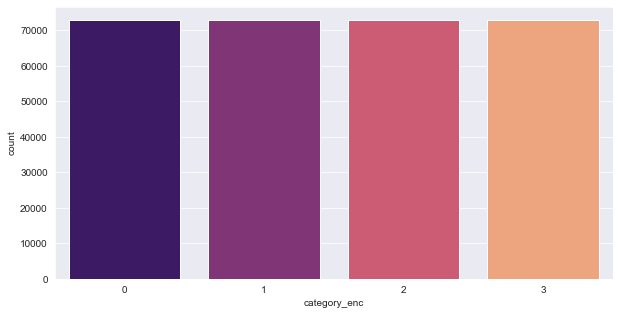

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(yres,palette='magma')

### XGBoost Model

In [ ]:
from xgboost import XGBClassifier
model_1 = XGBClassifier(random_state = 42)
model_1.fit(Xres, yres)
pred_1 = model_1.predict(X_test)
score1 = model_1.score(X_test,y_test)
print("Accuracy of base model: ",score1)

Accuracy of base model:  0.6174602114514148


In [ ]:
# from xgboost import plot_tree
# plot_tree(model_1)
# plt.show()

We need to tune our model by Hyperparameter Tuning so as to get better accuracy.

### HyperParameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
 params={'max_depth':[5], 'n_estimators': [200,300,400],
            'learning_rate': [0.15,0.20], 'subsample':[0.3,0.5,0.7]}

In [ ]:
model_2 = GridSearchCV(XGBClassifier(),params,refit=True,verbose=3)

In [ ]:
model_2.fit(Xres,yres)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] learning_rate=0.15, max_depth=5, n_estimators=200, subsample=0.3 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  learning_rate=0.15, max_depth=5, n_estimators=200, subsample=0.3, score=1.000, total=  39.6s
[CV] learning_rate=0.15, max_depth=5, n_estimators=200, subsample=0.3 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   39.5s remaining:    0.0s


[CV]  learning_rate=0.15, max_depth=5, n_estimators=200, subsample=0.3, score=1.000, total=  40.3s
[CV] learning_rate=0.15, max_depth=5, n_estimators=200, subsample=0.3 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.3min remaining:    0.0s


[CV]  learning_rate=0.15, max_depth=5, n_estimators=200, subsample=0.3, score=1.000, total=  43.1s
[CV] learning_rate=0.15, max_depth=5, n_estimators=200, subsample=0.3 
[CV]  learning_rate=0.15, max_depth=5, n_estimators=200, subsample=0.3, score=1.000, total=  44.6s
[CV] learning_rate=0.15, max_depth=5, n_estimators=200, subsample=0.3 
[CV]  learning_rate=0.15, max_depth=5, n_estimators=200, subsample=0.3, score=1.000, total=  44.8s
[CV] learning_rate=0.15, max_depth=5, n_estimators=200, subsample=0.5 
[CV]  learning_rate=0.15, max_depth=5, n_estimators=200, subsample=0.5, score=1.000, total=  54.0s
[CV] learning_rate=0.15, max_depth=5, n_estimators=200, subsample=0.5 
[CV]  learning_rate=0.15, max_depth=5, n_estimators=200, subsample=0.5, score=1.000, total=  54.8s
[CV] learning_rate=0.15, max_depth=5, n_estimators=200, subsample=0.5 
[CV]  learning_rate=0.15, max_depth=5, n_estimators=200, subsample=0.5, score=1.000, total=  55.1s
[CV] learning_rate=0.15, max_depth=5, n_estimators=

[CV]  learning_rate=0.2, max_depth=5, n_estimators=200, subsample=0.5, score=1.000, total=  47.2s
[CV] learning_rate=0.2, max_depth=5, n_estimators=200, subsample=0.5 .
[CV]  learning_rate=0.2, max_depth=5, n_estimators=200, subsample=0.5, score=1.000, total=  46.7s
[CV] learning_rate=0.2, max_depth=5, n_estimators=200, subsample=0.5 .
[CV]  learning_rate=0.2, max_depth=5, n_estimators=200, subsample=0.5, score=1.000, total=  44.5s
[CV] learning_rate=0.2, max_depth=5, n_estimators=200, subsample=0.5 .
[CV]  learning_rate=0.2, max_depth=5, n_estimators=200, subsample=0.5, score=1.000, total=  44.5s
[CV] learning_rate=0.2, max_depth=5, n_estimators=200, subsample=0.7 .
[CV]  learning_rate=0.2, max_depth=5, n_estimators=200, subsample=0.7, score=1.000, total=  47.3s
[CV] learning_rate=0.2, max_depth=5, n_estimators=200, subsample=0.7 .
[CV]  learning_rate=0.2, max_depth=5, n_estimators=200, subsample=0.7, score=1.000, total=  47.6s
[CV] learning_rate=0.2, max_depth=5, n_estimators=200, su

[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed: 95.3min finished


GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, validate_parameter

In [ ]:
model_2.best_params_

{'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.5}

In [ ]:
model_2.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=0.5,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
pred_2 = model_2.predict(X_test)

In [ ]:
score_2 = model_2.score(X_test,y_test)
print("Accuracy of 1st test model: ",score_2*100)

Accuracy of 1st test model:  81.8871977440094


In [ ]:
params_new={'max_depth':[4], 'n_estimators': [200,300],
           'learning_rate': [0.05,0.1], 'subsample':[0.5,0.7]}

In [ ]:
model_3 = GridSearchCV(XGBClassifier(),params_new,refit=True,verbose=3,
                       n_jobs=-1)

In [ ]:
model_3.fit(Xres,yres)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  24 | elapsed: 15.0min remaining:  5.0min
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed: 19.2min finished


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None,

In [ ]:
model_3.best_params_

{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 300, 'subsample': 0.7}

In [ ]:
model_3.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=300, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=0.7,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
pred_3 = model_3.predict(X_test)

In [ ]:
score_3 = model_3.score(X_test,y_test)
print("Accuracy of 2nd test model: ",score_3*100)

Accuracy of 2nd test model:  72.12177878698253


In [ ]:
params_4 = {'max_depth':[5], 'n_estimators': [200,300,500],
            'learning_rate': [0.20,0.30], 'subsample':[0.5,0.6,0.7]}
model_4 = GridSearchCV(XGBClassifier(),params_4,refit=True,verbose=3,
                       cv=3,n_jobs=-1)
model_4.fit(Xres,yres)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed: 14.3min
[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed: 59.8min finished


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None,

In [ ]:
model_4.best_params_

{'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.7}

In [ ]:
model_4.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=300, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=0.7,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
pred_4 = model_4.predict(X_test)

In [ ]:
score_4 = model_4.score(X_test,y_test)
print("Accuracy of 3rd test model: ",score_4*100)

Accuracy of 3rd test model:  67.00722783842245


In [ ]:
 params_5={'max_depth':[5,6], 'n_estimators': [200,300],
            'learning_rate': [0.20], 'subsample':[0.5,0.7,0.9]}

In [ ]:
model_5 = GridSearchCV(XGBClassifier(),params_5,refit=True,verbose=3)

In [ ]:
model_5.fit(Xres,yres)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] learning_rate=0.2, max_depth=5, n_estimators=200, subsample=0.5 .


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  learning_rate=0.2, max_depth=5, n_estimators=200, subsample=0.5, score=1.000, total= 1.0min
[CV] learning_rate=0.2, max_depth=5, n_estimators=200, subsample=0.5 .


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   59.9s remaining:    0.0s


[CV]  learning_rate=0.2, max_depth=5, n_estimators=200, subsample=0.5, score=1.000, total=  56.2s
[CV] learning_rate=0.2, max_depth=5, n_estimators=200, subsample=0.5 .


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.9min remaining:    0.0s


[CV]  learning_rate=0.2, max_depth=5, n_estimators=200, subsample=0.5, score=1.000, total=  56.8s
[CV] learning_rate=0.2, max_depth=5, n_estimators=200, subsample=0.5 .
[CV]  learning_rate=0.2, max_depth=5, n_estimators=200, subsample=0.5, score=1.000, total= 1.1min
[CV] learning_rate=0.2, max_depth=5, n_estimators=200, subsample=0.5 .
[CV]  learning_rate=0.2, max_depth=5, n_estimators=200, subsample=0.5, score=1.000, total=  56.3s
[CV] learning_rate=0.2, max_depth=5, n_estimators=200, subsample=0.7 .
[CV]  learning_rate=0.2, max_depth=5, n_estimators=200, subsample=0.7, score=1.000, total=  58.1s
[CV] learning_rate=0.2, max_depth=5, n_estimators=200, subsample=0.7 .
[CV]  learning_rate=0.2, max_depth=5, n_estimators=200, subsample=0.7, score=1.000, total=  56.4s
[CV] learning_rate=0.2, max_depth=5, n_estimators=200, subsample=0.7 .
[CV]  learning_rate=0.2, max_depth=5, n_estimators=200, subsample=0.7, score=1.000, total=  59.9s
[CV] learning_rate=0.2, max_depth=5, n_estimators=200, su

[CV]  learning_rate=0.2, max_depth=6, n_estimators=300, subsample=0.7, score=1.000, total= 1.2min
[CV] learning_rate=0.2, max_depth=6, n_estimators=300, subsample=0.7 .
[CV]  learning_rate=0.2, max_depth=6, n_estimators=300, subsample=0.7, score=1.000, total= 1.2min
[CV] learning_rate=0.2, max_depth=6, n_estimators=300, subsample=0.7 .
[CV]  learning_rate=0.2, max_depth=6, n_estimators=300, subsample=0.7, score=1.000, total= 1.2min
[CV] learning_rate=0.2, max_depth=6, n_estimators=300, subsample=0.7 .
[CV]  learning_rate=0.2, max_depth=6, n_estimators=300, subsample=0.7, score=1.000, total= 1.2min
[CV] learning_rate=0.2, max_depth=6, n_estimators=300, subsample=0.9 .
[CV]  learning_rate=0.2, max_depth=6, n_estimators=300, subsample=0.9, score=1.000, total= 1.3min
[CV] learning_rate=0.2, max_depth=6, n_estimators=300, subsample=0.9 .
[CV]  learning_rate=0.2, max_depth=6, n_estimators=300, subsample=0.9, score=1.000, total= 1.3min
[CV] learning_rate=0.2, max_depth=6, n_estimators=300, su

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed: 66.3min finished


GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, validate_parameter

In [ ]:
model_5.best_params_

{'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.5}

In [ ]:
model_5.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=0.5,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
pred_5 = model_5.predict(X_test)

In [ ]:
score_5 = model_5.score(X_test,y_test)
print("Accuracy of 4th test model: ",score_5*100)

Accuracy of 4th test model:  81.8871977440094


In [ ]:
params_6 = {'max_depth':[5], 'n_estimators': [200,300,500],
            'learning_rate': [0.20,0.30], 'subsample':[0.5,0.6,0.7]}
model_6 = GridSearchCV(XGBClassifier(),params_4,refit=True,verbose=3,
                       cv=5,n_jobs=-1)
model_6.fit(Xres,yres)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed: 16.3min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed: 109.4min finished


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None,

In [ ]:
model_6.best_params_

{'learning_rate': 0.3, 'max_depth': 5, 'n_estimators': 500, 'subsample': 0.6}

In [ ]:
model_6.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=0.6,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
pred_6 = model_6.predict(X_test)

In [ ]:
score_6 = model_6.score(X_test,y_test)
print("Accuracy of 5th model: ",score_6*100)

Accuracy of 5th model:  90.48741227574007


In [ ]:
print("Results of various Parameter tuned models ")
print("Base model 0: ",round(score1*100,2),"%")
print("Test model 1: ",round(score_2*100,2),"%")
print("Test model 2: ",round(score_3*100,2),"%")
print("Test model 3: ",round(score_4*100,2),"%")
print("Test model 4: ",round(score_5*100,2),"%")
print("Test model 5: ",round(score_6*100,2),"%")

Results of various Parameter tuned models 
Base model 0:  61.75 %
Test model 1:  81.89 %
Test model 2:  72.12 %
Test model 3:  67.01 %
Test model 4:  81.89 %
Test model 5:  90.49 %


So after hyperparameter tuning, Accuracy has increased from 61.75% to 90.49%.  

### K Fold Cross Validation

In [ ]:
# from sklearn.model_selection import KFold,StratifiedKFold,cross_val_score
# def evaluate_model(model):
    
#     KF=KFold(n_splits=10,shuffle=True,random_state=42)
#     score1 = cross_val_score(model, Xres, yres, scoring='accuracy', cv=KF)
    
#     SKF= StratifiedKFold(n_splits=10,shuffle=True)
#     score2 = cross_val_score(model, Xres, yres, scoring='accuracy', cv=SKF)
    
#     list_scores=[np.mean(score1),np.mean(score2)]
    
#     return list_scores


In [ ]:
# names=["KFold","Stratified KFold"]
# print("KFOLD CROSS VALIDATION SCORES")
# print("(For Base Model 0)")
# scores_k1 = evaluate_model(model_1)

# for (i,j) in zip(scores_k1,names):
#     print(j,"-",round(i*100,2),'%')
   

### Results

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, auc, roc_curve, roc_auc_score
from sklearn import metrics


In [ ]:
print("Results of various Parameter tuned models ")
print("Base model 0: ",round(score1*100,2),"%")
print("Test model 1: ",round(score_2*100,2),"%")
print("Test model 2: ",round(score_3*100,2),"%")
print("Test model 3: ",round(score_4*100,2),"%")
print("Test model 4: ",round(score_5*100,2),"%")
print("Test model 5: ",round(score_6*100,2),"%")

Results of various Parameter tuned models 
Base model 0:  61.75 %
Test model 1:  81.89 %
Test model 2:  72.12 %
Test model 3:  67.01 %
Test model 4:  81.89 %
Test model 5:  90.49 %


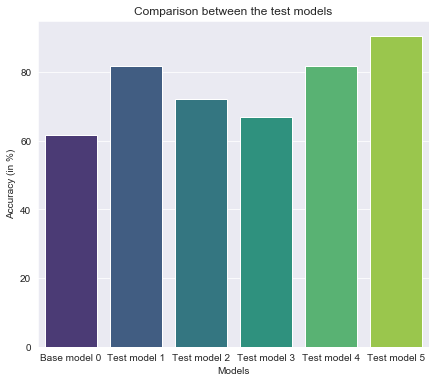

In [ ]:
plt.figure(figsize=(7,6))
results = [score1*100,score_2*100,score_3*100,score_4*100,score_5*100,score_6*100]
model_names = ['Base model 0','Test model 1','Test model 2','Test model 3','Test model 4', 'Test model 5']
sns.barplot(x = model_names, y=results, palette='viridis')
plt.xlabel('Models')
plt.ylabel('Accuracy (in %)')
plt.title('Comparison between the test models')
plt.show()

In [ ]:
print(confusion_matrix(y_test,pred_6))

[[378939   1481      0   4889]
 [   181 266694      0  63237]
 [     0      0    107      0]
 [     5      0      0  18158]]


In [ ]:
# Classification Report of tuned model (Test Model 5)
print(classification_report(y_test,pred_6))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99    385309
           1       0.99      0.81      0.89    330112
           2       1.00      1.00      1.00       107
           3       0.21      1.00      0.35     18163

    accuracy                           0.90    733691
   macro avg       0.80      0.95      0.81    733691
weighted avg       0.98      0.90      0.93    733691



##### Inferences from the report:  
 - Recall of the model is 0.90, i.e. 90% of the predicted vaues were true(1).
 - Precision of the model is 0.98, i.e. 98% of the predicted true values were correct.
 - F1-Score is also pretty high, 0.93 that means the precision and recall of our model is high.


In [ ]:
print(confusion_matrix(y_test,pred_1))

[[381229    647      0   3433]
 [   457  53532      0 276123]
 [     0      0    107      0]
 [     5      1      0  18157]]


In [ ]:
# Classification Report of base model
print(classification_report(y_test,pred_1))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99    385309
           1       0.99      0.16      0.28    330112
           2       1.00      1.00      1.00       107
           3       0.06      1.00      0.11     18163

    accuracy                           0.62    733691
   macro avg       0.76      0.79      0.60    733691
weighted avg       0.97      0.62      0.65    733691



##### Inferences from the report:  
 - Recall of the model is 0.62, i.e. 62% of the predicted vaues were true(1).
 - Precision of the model is 0.97, i.e. 97% of the predicted true values were correct.
 - F1 score is not very high, 0.65 this is due to low recall.
